# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Importamos as bibliotecas nescessárias para as nossas análises:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Escrevemos esta linha de código para que os gráficos sejam criados abaixo de nossa linha de código e não em outra plataforma ou janela para
# que possamos visualizar com mais facilidade:
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
# Carregamos a nossa base de dados que usaremos em nossa análise:
sinasc_raw = pd.read_csv('Profissão_Cientista_de_Dados_M9_A1_SINASC_RO_2019.csv')

# Mostramos o DataFrame para verificação e visualização de dados;
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Vamos verificar as colunas existentes em nosso DataFrame de modo mais explícito para que possamos fazer as nossas análises:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia para pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
# Construiremos um novo DataFrame com as colunas 'munResLat' e 'SEMAGESTAC' para que possamos começar a nossa primeira análise:
sinasc_1 = sinasc_raw[['munResLat', 'SEMAGESTAC']]

# Mostramos a nossa base de dados para visualização e verificação:
sinasc_1.head(5)

,munResLat,SEMAGESTAC
0,-11.93554,39.0
1,-11.93554,38.0
2,-11.93554,40.0
3,-12.13178,38.0
4,-11.93554,38.0


In [5]:
# Agora vamos aplicar o método Mapping para separar a coluna 'munResLat' em duas faixas de valores: uma abaixo de -10.5 e outra acima.
sinasc_1['lat_categoria'] = sinasc_1['munResLat'].map(lambda x: 'Mais ao Sul' if x <= -10.5 else 'Mais ao Norte')

# Mostramos o DataFrame para visualização e verificação:
sinasc_1.head()

/tmp/ipykernel_6355/1827266541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1['lat_categoria'] = sinasc_1['munResLat'].map(lambda x: 'Mais ao Sul' if x <= -10.5 else 'Mais ao Norte')


,munResLat,SEMAGESTAC,lat_categoria
0,-11.93554,39.0,Mais ao Sul
1,-11.93554,38.0,Mais ao Sul
2,-11.93554,40.0,Mais ao Sul
3,-12.13178,38.0,Mais ao Sul
4,-11.93554,38.0,Mais ao Sul


In [6]:
# Finalmente, vamos agrupar segunndo a nova coluna 'lat_categoria', aplicamos o método de agregação de funções e aplicamos as funções
# 'sum', 'mean', 'min', 'max', 'median', 'std' e 'var':
sinasc_1.groupby(['lat_categoria']).agg({'SEMAGESTAC' : [('soma','sum'), 
                                                         ('média','mean'), 
                                                         ('mínimo','min'), 
                                                         ('máximo','max'), 
                                                         ('mediana','median'),
                                                         ('desvio-padrão','std'), 
                                                         ('variância','var')]
                                        })

SEMAGESTAC                                                 \
                    soma      média mínimo máximo mediana desvio-padrão   
lat_categoria                                                             
Mais ao Norte   511987.0  38.588107   21.0   45.0    39.0      2.020771   
Mais ao Sul     482665.0  38.545360   19.0   45.0    39.0      2.012435   

                         
              variância  
lat_categoria            
Mais ao Norte  4.083516  
Mais ao Sul    4.049895

In [7]:
# Construiremos um novo DataFrame com as colunas 'munResLat' e 'CONSPRENAT' para que possamos começar a nossa primeira análise:
sinasc_2 = sinasc_raw[['munResLat', 'CONSPRENAT']]

# Mostramos a nossa base de dados para visualização e verificação:
sinasc_2.head(5)

,munResLat,CONSPRENAT
0,-11.93554,8.0
1,-11.93554,10.0
2,-11.93554,8.0
3,-12.13178,6.0
4,-11.93554,8.0


In [8]:
# Agora vamos aplicar o método Mapping para separar a coluna 'munResLat' em duas faixas de valores: uma abaixo de -10.5 e outra acima.
sinasc_2['lat_categoria'] = sinasc_2['munResLat'].map(lambda x: 'Mais ao Sul' if x <= -10.5 else 'Mais ao Norte')

# Mostramos o DataFrame para visualização e verificação:
sinasc_2.head()

/tmp/ipykernel_6355/1286587953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['lat_categoria'] = sinasc_2['munResLat'].map(lambda x: 'Mais ao Sul' if x <= -10.5 else 'Mais ao Norte')


,munResLat,CONSPRENAT,lat_categoria
0,-11.93554,8.0,Mais ao Sul
1,-11.93554,10.0,Mais ao Sul
2,-11.93554,8.0,Mais ao Sul
3,-12.13178,6.0,Mais ao Sul
4,-11.93554,8.0,Mais ao Sul


In [9]:
# Finalmente, vamos agrupar segunndo a nova coluna 'lat_categoria', aplicamos o método de agregação de funções e aplicamos as funções
# 'sum', 'mean', 'min', 'max', 'median', 'std' e 'var':
sinasc_2.groupby(['lat_categoria']).agg({'CONSPRENAT' : [('soma','sum'), 
                                                         ('média','mean'), 
                                                         ('mínimo','min'), 
                                                         ('máximo','max'), 
                                                         ('mediana','median'),
                                                         ('desvio-padrão','std'), 
                                                         ('variância','var')]
                                        })

CONSPRENAT                                                \
                    soma     média mínimo máximo mediana desvio-padrão   
lat_categoria                                                            
Mais ao Norte   105365.0  7.930528    0.0   99.0     8.0      5.863848   
Mais ao Sul     110072.0  8.591321    0.0   99.0     8.0      4.243102   

                          
               variância  
lat_categoria             
Mais ao Norte  34.384710  
Mais ao Sul    18.003915

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia para pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
# Construiremos um novo DataFrame com as colunas 'munResArea' e 'SEMAGESTAC' para que possamos começar a nossa primeira análise:
sinasc_3 = sinasc_raw[['munResArea', 'SEMAGESTAC']]

# Mostramos a nossa base de dados para visualização e verificação:
sinasc_3.head(5)

,munResArea,SEMAGESTAC
0,7067.025,39.0
1,7067.025,38.0
2,7067.025,40.0
3,3958.273,38.0
4,7067.025,38.0


In [11]:
# Agora vamos aplicar o método Mapping para separar a coluna 'munResArea' em duas faixas de valores: uma abaixo de 3000 e outra acima.
sinasc_3['area_categoria'] = sinasc_3['munResArea'].map(lambda x: 'Mais abaixo' if x <= 3000 else 'Mais acima')

# Mostramos o DataFrame para visualização e verificação:
sinasc_3.head()

/tmp/ipykernel_6355/3208218514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_3['area_categoria'] = sinasc_3['munResArea'].map(lambda x: 'Mais abaixo' if x <= 3000 else 'Mais acima')


,munResArea,SEMAGESTAC,area_categoria
0,7067.025,39.0,Mais acima
1,7067.025,38.0,Mais acima
2,7067.025,40.0,Mais acima
3,3958.273,38.0,Mais acima
4,7067.025,38.0,Mais acima


In [12]:
# Finalmente, vamos agrupar segundo a nova coluna 'area_categoria', aplicamos o método de agregação de funções e aplicamos as funções
# 'sum', 'mean', 'min', 'max', 'median', 'std' e 'var':
sinasc_3.groupby(['area_categoria']).agg({'SEMAGESTAC' : [('soma','sum'), 
                                                         ('média','mean'), 
                                                         ('mínimo','min'), 
                                                         ('máximo','max'), 
                                                         ('mediana','median'),
                                                         ('desvio-padrão','std'), 
                                                         ('variância','var')]
                                        })

SEMAGESTAC                                                 \
                     soma      média mínimo máximo mediana desvio-padrão   
area_categoria                                                             
Mais abaixo      197469.0  38.470485   21.0   45.0    39.0      1.874927   
Mais acima       797183.0  38.591422   19.0   45.0    39.0      2.049867   

                          
               variância  
area_categoria            
Mais abaixo     3.515350  
Mais acima      4.201956

In [13]:
# Construiremos um novo DataFrame com as colunas 'munResArea' e 'SEMAGESTAC' para que possamos começar a nossa primeira análise:
sinasc_4 = sinasc_raw[['munResArea', 'CONSPRENAT']]

# Mostramos a nossa base de dados para visualização e verificação:
sinasc_4.head(5)

,munResArea,CONSPRENAT
0,7067.025,8.0
1,7067.025,10.0
2,7067.025,8.0
3,3958.273,6.0
4,7067.025,8.0


In [14]:
# Agora vamos aplicar o método Mapping para separar a coluna 'munResArea' em duas faixas de valores: uma abaixo de 3000 e outra acima.
sinasc_4['area_categoria'] = sinasc_3['munResArea'].map(lambda x: 'Mais abaixo' if x <= 3000 else 'Mais acima')

# Mostramos o DataFrame para visualização e verificação:
sinasc_4.head()

/tmp/ipykernel_6355/1162785991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['area_categoria'] = sinasc_3['munResArea'].map(lambda x: 'Mais abaixo' if x <= 3000 else 'Mais acima')


,munResArea,CONSPRENAT,area_categoria
0,7067.025,8.0,Mais acima
1,7067.025,10.0,Mais acima
2,7067.025,8.0,Mais acima
3,3958.273,6.0,Mais acima
4,7067.025,8.0,Mais acima


In [15]:
# Finalmente, vamos agrupar segundo a nova coluna 'area_categoria', aplicamos o método de agregação de funções e aplicamos as funções
# 'sum', 'mean', 'min', 'max', 'median', 'std' e 'var':
sinasc_4.groupby(['area_categoria']).agg({'CONSPRENAT' : [('soma','sum'), 
                                                         ('média','mean'), 
                                                         ('mínimo','min'), 
                                                         ('máximo','max'), 
                                                         ('mediana','median'),
                                                         ('desvio-padrão','std'), 
                                                         ('variância','var')]
                                        })

CONSPRENAT                                                \
                     soma     média mínimo máximo mediana desvio-padrão   
area_categoria                                                            
Mais abaixo       44775.0  8.709395    0.0   99.0     8.0      4.290017   
Mais acima       170662.0  8.143437    0.0   99.0     8.0      5.325701   

                           
                variância  
area_categoria             
Mais abaixo     18.404248  
Mais acima      28.363086

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
# Construiremos um novo DataFrame com as colunas 'munResAlt' e 'SEMAGESTAC' para que possamos começar a nossa primeira análise:
sinasc_5 = sinasc_raw[['munResAlt', 'SEMAGESTAC']]

In [17]:
# Separamos as altitudes dos municípios usando o método do Pandas 'qcut' na feature 'munResAlt' em duas categorias segundo a linha de
# código abaixo:
sinasc_5['alt_categoria'] = pd.qcut(sinasc_5['munResAlt'],2)

/tmp/ipykernel_6355/3519268520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_5['alt_categoria'] = pd.qcut(sinasc_5['munResAlt'],2)


In [18]:
# Mostramos o DataFrame para visualização e verificação:
sinasc_5.head()

,munResAlt,SEMAGESTAC,alt_categoria
0,338.0,39.0,"(153.0, 595.0]"
1,338.0,38.0,"(153.0, 595.0]"
2,338.0,40.0,"(153.0, 595.0]"
3,397.0,38.0,"(153.0, 595.0]"
4,338.0,38.0,"(153.0, 595.0]"


In [19]:
# Agora vamos agregar as funções de soma, média, mínimo, máximo, mediana, desvio-padrão e variância aplicada à coluna 'SEMAGESTAC', que foi
# agrupada segundo à categorização da altura dos municípios:
sinasc_5.groupby('alt_categoria').agg({'SEMAGESTAC': [('soma','sum'), 
                                                      ('média','mean'), 
                                                      ('mínimo','min'), 
                                                      ('máximo','max'), 
                                                      ('mediana','median'),
                                                      ('desvio-padrão','std'), 
                                                      ('variância','var')]
                                      })

/tmp/ipykernel_6355/1957981790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_5.groupby('alt_categoria').agg({'SEMAGESTAC': [('soma','sum'),


SEMAGESTAC                                                 \
                      soma      média mínimo máximo mediana desvio-padrão   
alt_categoria                                                               
(84.999, 153.0]   493526.0  38.568771   21.0   45.0    39.0      2.093561   
(153.0, 595.0]    501090.0  38.566151   19.0   45.0    39.0      1.938267   

                           
                variância  
alt_categoria              
(84.999, 153.0]  4.383000  
(153.0, 595.0]   3.756881

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [20]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [21]:
# Nesta linha de código construímos um DataFrame com as colunas que precisamos para plotar o nosso gráfico:
sinasc_6 = sinasc_raw[['munResNome','IDADEMAE','DTNASC']]

In [22]:
# Vamos mostrar o nosso DataFrame para visualização e verificação:
sinasc_6.head()

,munResNome,IDADEMAE,DTNASC
0,Alta Floresta D'Oeste,19,2019-02-19
1,Alta Floresta D'Oeste,29,2019-02-21
2,Alta Floresta D'Oeste,37,2019-02-25
3,Alto Alegre dos Parecis,30,2019-03-20
4,Alta Floresta D'Oeste,30,2019-03-23


In [23]:
# Vamos criar uma nova coluna com as regiões imediatas correspondentes de cada município:
sinasc_6['imediatas'] = sinasc_6['munResNome'].map(imediatas)

/tmp/ipykernel_6355/3731581964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_6['imediatas'] = sinasc_6['munResNome'].map(imediatas)


In [24]:
# Mostramos novamente o DataFrame para visualização e verificação:
sinasc_6.head()

,munResNome,IDADEMAE,DTNASC,imediatas
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal


In [25]:
# Nestas linhas de código, vamos calcular a média das idades das mães segundo as datas de nascimento dos bebês:
sinasc_plot = sinasc_6.groupby(['DTNASC','imediatas'])[['IDADEMAE']].mean().reset_index()

In [26]:
sinasc_plot['mes_nascimento'] = pd.to_datetime(sinasc_plot['DTNASC'])

In [27]:
# Vamos mostrar o novo DataFrame para visualização e verificação:
sinasc_plot.head()

,DTNASC,imediatas,IDADEMAE,mes_nascimento
0,2019-01-01,Ariquemes,23.200000,2019-01-01
1,2019-01-01,Cacoal,23.250000,2019-01-01
2,2019-01-01,Jaru,31.000000,2019-01-01
3,2019-01-01,Ji-Paraná,24.142857,2019-01-01
4,2019-01-01,Porto Velho,21.388889,2019-01-01


In [28]:
# Vamos criar uma nova coluna em que as datas de nascimento serão os meses e não os dias e substituir na coluna DTNASC:
sinasc_plot['mes_nascimento'] = sinasc_plot['mes_nascimento'].dt.strftime('%Y-%m')

In [29]:
# Ordenar por mês e ano é recomendável para plotar o gráfico, pois as linhas podem fazer um zigue-zague no gráfico, quando plotarmos:
sinasc_plot = sinasc_plot.sort_values('mes_nascimento')

In [30]:
# Vamos mostrar o novo DataFrame para visualização e verificação:
sinasc_plot.head()

,DTNASC,imediatas,IDADEMAE,mes_nascimento
0,2019-01-01,Ariquemes,23.200000,2019-01
119,2019-01-20,Vilhena,22.250000,2019-01
120,2019-01-21,Ariquemes,22.600000,2019-01
121,2019-01-21,Cacoal,25.590909,2019-01
122,2019-01-21,Jaru,26.636364,2019-01


In [31]:
# Para plotar o gráfico, vamos determinar o tamanho da figura que irá receber o nosso gráfico:
plt.figure( figsize = (12,6) )

<Figure size 1200x600 with 0 Axes>

In [32]:
# Agora vamos construir um loop que iŕa plotar, para cada região imediata, os dados das datas de nascimento e as médias das idades das 
# mães:
for regiao in sinasc_plot['imediatas'].unique():
    dados_regiao = sinasc_plot[sinasc_plot['imediatas'] == regiao]
    plt.plot(dados_regiao['mes_nascimento'], dados_regiao['IDADEMAE'], label = regiao)

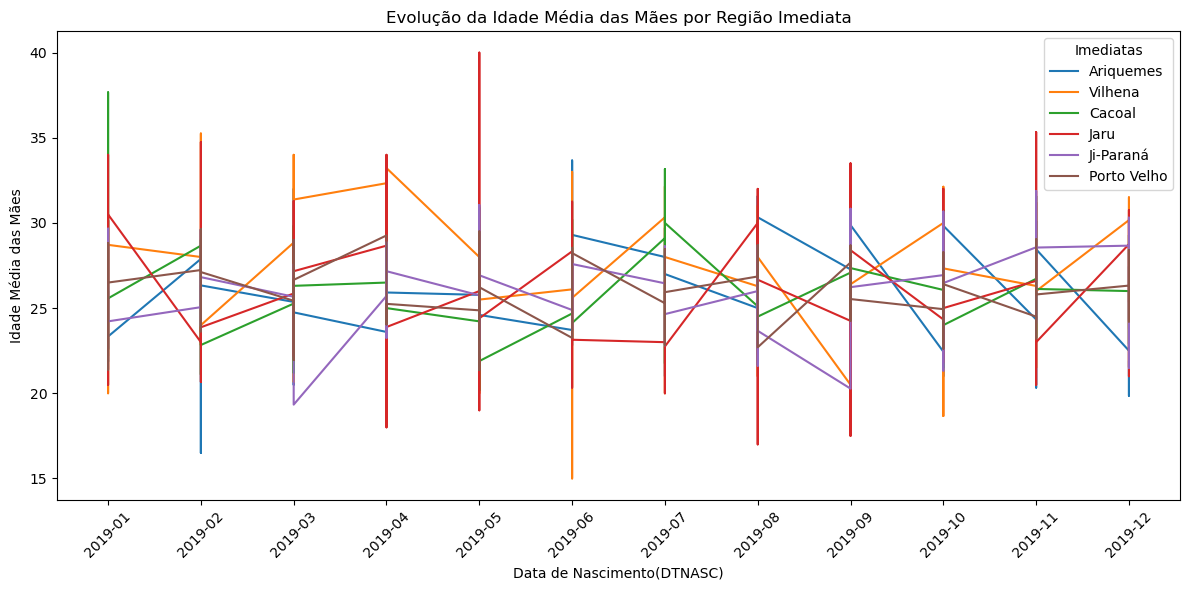

In [33]:
# Para finalizar, vamos plotar as informações que construímos nos snipets acima:
plt.xlabel('Data de Nascimento(DTNASC)')
plt.ylabel('Idade Média das Mães')
plt.title('Evolução da Idade Média das Mães por Região Imediata')
plt.legend(title = 'Imediatas')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M

In [34]:
IDH = {
    "Porto Velho" : "IDH-M alto",
 	"Vilhena" : "IDH-M alto",
 	"Cacoal" : "IDH-M alto",
 	"Ji-Paraná" : "IDH-M alto", 	
 	"Pimenta Bueno" : "IDH-M alto",
 	"Ariquemes" : "IDH-M alto",
 	"Rolim de Moura" : "IDH-M alto",
    "Cerejeiras" : "IDH-M médio",
 	"Jaru" : "IDH-M médio",
 	"Colorado do Oeste" : "IDH-M médio",
 	"Ouro Preto do Oeste" : "IDH-M médio",
 	"Espigão d'Oeste" : "IDH-M médio",
 	"Santa Luzia d'Oeste" : "IDH-M médio",
 	"Pimenteiras do Oeste" : "IDH-M médio",
 	"Presidente Médici" : "IDH-M médio",
 	"Castanheiras" : "IDH-M médio",
 	"Guajará-Mirim" : "IDH-M médio",
 	"Chupinguaia" : "IDH-M médio",
 	"Cabixi" : "IDH-M médio",
 	"Candeias do Jamari" : "IDH-M médio",
 	"São Felipe d'Oeste" : "IDH-M médio",
 	"Cacaulândia" : "IDH-M médio",
 	"São Miguel do Guaporé" : "IDH-M médio",
 	"Mirante da Serra" : "IDH-M médio",
	"Alvorada d'Oeste" : "IDH-M médio",
 	"Teixeirópolis" : "IDH-M médio",
 	"Nova Brasilândia d'Oeste" : "IDH-M médio",
 	"Rio Crespo" : "IDH-M médio",
 	"Primavera de Rondônia" : "IDH-M médio",
 	"Alta Floresta d'Oeste" : "IDH-M médio",
 	"Ministro Andreazza" : "IDH-M médio",
 	"Novo Horizonte do Oeste" : "IDH-M médio",
 	"Vale do Paraíso" : "IDH-M médio",
 	"Alto Paraíso" : "IDH-M médio",
 	"Parecis" : "IDH-M médio",
 	"Buritis" : "IDH-M médio",
 	"Itapuã do Oeste" : "IDH-M médio",
 	"Corumbiara" : "IDH-M médio",
 	"Cujubim" : "IDH-M médio",
 	"Costa Marques" : "IDH-M médio",
 	"São Francisco do Guaporé" : "IDH-M médio",
 	"Urupá" : "IDH-M médio",
 	"Monte Negro" : "IDH-M médio",
    "Seringueiras" : "IDH-M baixo",
 	"Governador Jorge Teixeira" : "IDH-M baixo",
	"Machadinho d'Oeste" : "IDH-M baixo",
 	"Campo Novo de Rondônia" : "IDH-M baixo",
 	"Alto Alegre dos Parecis" : "IDH-M baixo",
    "Theobroma" : "IDH-M baixo",
 	"Nova União" : "IDH-M baixo",
 	"Nova Mamoré" : "IDH-M baixo",
 	"Vale do Anari" : "IDH-M baixo"
}

In [35]:
# Vamos construir um DataFrame com a idade das mães e a idade dos pais:
sinasc_8 = sinasc_raw[['munResNome','IDADEMAE']]

In [36]:
# Para visualizar e verificar, vamos mostrar a nossa base de dados:
sinasc_8.head()

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30


In [37]:
# Nesta linha de código, vamos construir uma nova coluna chamada 'IDH_M' com a classificação dos municípios de acordo com o seu IDH:
sinasc_8['IDH_M'] = sinasc_8['munResNome'].map(IDH)

/tmp/ipykernel_6355/122623580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_8['IDH_M'] = sinasc_8['munResNome'].map(IDH)


In [38]:
# Vamos mostrar o DataFrame para visualização e verificação:
sinasc_8.head()

,munResNome,IDADEMAE,IDH_M
0,Alta Floresta D'Oeste,19,NaN
1,Alta Floresta D'Oeste,29,NaN
2,Alta Floresta D'Oeste,37,NaN
3,Alto Alegre dos Parecis,30,IDH-M baixo
4,Alta Floresta D'Oeste,30,NaN


In [39]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_8 = sinasc_8.dropna( subset = ['IDH_M'] )

In [40]:
print(sinasc_8['IDH_M'].isna().sum())

0


In [41]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_8.head()

,munResNome,IDADEMAE,IDH_M
3,Alto Alegre dos Parecis,30,IDH-M baixo
6,Novo Horizonte do Oeste,37,IDH-M médio
21,Rolim de Moura,31,IDH-M alto
23,Alto Alegre dos Parecis,26,IDH-M baixo
24,Alto Alegre dos Parecis,26,IDH-M baixo


In [42]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_1 = sinasc_8.groupby('IDH_M').agg({'IDADEMAE': [('soma','sum'), 
                                                        ('média','mean'), 
                                                        ('mínimo','min'), 
                                                        ('máximo','max'), 
                                                        ('mediana','median'),
                                                        ('desvio-padrão','std'), 
                                                        ('variância','var')]
                                         })    

In [43]:
# Vamos mostrar o resultado para visualização e análise:
resultado_1

IDADEMAE                                                          
                soma      média mínimo máximo mediana desvio-padrão  variância
IDH_M                                                                         
IDH-M alto    442955  26.280332     12     47    26.0      6.415374  41.157021
IDH-M baixo    33507  25.269231     13     46    25.0      6.103193  37.248970
IDH-M médio   178611  25.848191     11     53    25.0      6.372794  40.612499

In [44]:
# Vamos construir um DataFrame com a idade dos pais:
sinasc_9 = sinasc_raw[['munResNome','IDADEPAI']]

In [45]:
# Para visualizar e verificar, vamos mostrar a nossa base de dados:
sinasc_9.head()

,munResNome,IDADEPAI
0,Alta Floresta D'Oeste,26.0
1,Alta Floresta D'Oeste,24.0
2,Alta Floresta D'Oeste,32.0
3,Alto Alegre dos Parecis,24.0
4,Alta Floresta D'Oeste,27.0


In [46]:
# Nesta linha de código, vamos construir uma nova coluna chamada 'IDH_M' com a classificação dos municípios de acordo com o seu IDH:
sinasc_9['IDH_M'] = sinasc_9['munResNome'].map(IDH)

/tmp/ipykernel_6355/3635877295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_9['IDH_M'] = sinasc_9['munResNome'].map(IDH)


In [47]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_9.head()

,munResNome,IDADEPAI,IDH_M
0,Alta Floresta D'Oeste,26.0,NaN
1,Alta Floresta D'Oeste,24.0,NaN
2,Alta Floresta D'Oeste,32.0,NaN
3,Alto Alegre dos Parecis,24.0,IDH-M baixo
4,Alta Floresta D'Oeste,27.0,NaN


In [48]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_9 = sinasc_9.dropna( subset = ['IDH_M'] )

In [49]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_2 = sinasc_9.groupby('IDH_M').agg({'IDADEPAI': [('soma','sum'), 
                                                        ('média','mean'), 
                                                        ('mínimo','min'), 
                                                        ('máximo','max'), 
                                                        ('mediana','median'),
                                                        ('desvio-padrão','std'), 
                                                        ('variância','var')]
                                         })    

In [50]:
# Vamos mostrar o resultado para visualização e análise:
resultado_2

IDADEPAI                                                 \
                 soma      média mínimo máximo mediana desvio-padrão   
IDH_M                                                                  
IDH-M alto   140082.0  31.074091   15.0   70.0    30.0      7.773149   
IDH-M baixo   10428.0  30.402332   16.0   58.0    30.0      7.141936   
IDH-M médio   54774.0  31.570029   16.0   73.0    31.0      7.864526   

                        
             variância  
IDH_M                   
IDH-M alto   60.421845  
IDH-M baixo  51.007246  
IDH-M médio  61.850774

In [51]:
# Vamos construir um DataFrame que tenha as colunas dos municípios e da quantidade de semanas de gestação:
sinasc_10 = sinasc_raw[['munResNome', 'SEMAGESTAC']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_10.head()

,munResNome,SEMAGESTAC
0,Alta Floresta D'Oeste,39.0
1,Alta Floresta D'Oeste,38.0
2,Alta Floresta D'Oeste,40.0
3,Alto Alegre dos Parecis,38.0
4,Alta Floresta D'Oeste,38.0


In [52]:
# Vamos fazer o Mapping deste DataFrame segundo o IDH-Médio:
sinasc_10['idh_medio'] = sinasc_10['munResNome'].map(IDH)

# Mostramos o DataFrame para visualização e verificação:
sinasc_10.head()

/tmp/ipykernel_6355/1099689224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_10['idh_medio'] = sinasc_10['munResNome'].map(IDH)


,munResNome,SEMAGESTAC,idh_medio
0,Alta Floresta D'Oeste,39.0,NaN
1,Alta Floresta D'Oeste,38.0,NaN
2,Alta Floresta D'Oeste,40.0,NaN
3,Alto Alegre dos Parecis,38.0,IDH-M baixo
4,Alta Floresta D'Oeste,38.0,NaN


In [53]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_10 = sinasc_10.dropna( subset = ['idh_medio'] )

In [54]:
print(sinasc_10['idh_medio'].isna().sum())

0


In [55]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_10.head()

,munResNome,SEMAGESTAC,idh_medio
3,Alto Alegre dos Parecis,38.0,IDH-M baixo
6,Novo Horizonte do Oeste,38.0,IDH-M médio
21,Rolim de Moura,38.0,IDH-M alto
23,Alto Alegre dos Parecis,38.0,IDH-M baixo
24,Alto Alegre dos Parecis,38.0,IDH-M baixo


In [56]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_3 = sinasc_10.groupby('idh_medio').agg({'SEMAGESTAC': [('soma','sum'), 
                                                           ('média','mean'), 
                                                           ('mínimo','min'), 
                                                           ('máximo','max'), 
                                                           ('mediana','median'),
                                                           ('desvio-padrão','std'), 
                                                           ('variância','var')]
                                            })

In [57]:
# Vamos mostrar o resultado para visualização e análise:
resultado_3

SEMAGESTAC                                                 \
                  soma      média mínimo máximo mediana desvio-padrão   
idh_medio                                                               
IDH-M alto    613640.0  38.579153   19.0   45.0    39.0      2.026930   
IDH-M baixo    49411.0  38.542122   19.0   44.0    39.0      1.898318   
IDH-M médio   259408.0  38.545022   21.0   45.0    39.0      1.977465   

                       
            variância  
idh_medio              
IDH-M alto   4.108447  
IDH-M baixo  3.603611  
IDH-M médio  3.910367

In [58]:
# Vamos construir um DataFrame que tenha as colunas dos municípios e da quantidade de semanas de gestação:
sinasc_11 = sinasc_raw[['munResNome', 'CONSPRENAT']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_11.head()

,munResNome,CONSPRENAT
0,Alta Floresta D'Oeste,8.0
1,Alta Floresta D'Oeste,10.0
2,Alta Floresta D'Oeste,8.0
3,Alto Alegre dos Parecis,6.0
4,Alta Floresta D'Oeste,8.0


In [59]:
# Vamos fazer o Mapping deste DataFrame segundo o IDH-Médio:
sinasc_11['idh_medio'] = sinasc_11['munResNome'].map(IDH)

# Mostramos o DataFrame para visualização e verificação:
sinasc_11.head()

/tmp/ipykernel_6355/3038862238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_11['idh_medio'] = sinasc_11['munResNome'].map(IDH)


,munResNome,CONSPRENAT,idh_medio
0,Alta Floresta D'Oeste,8.0,NaN
1,Alta Floresta D'Oeste,10.0,NaN
2,Alta Floresta D'Oeste,8.0,NaN
3,Alto Alegre dos Parecis,6.0,IDH-M baixo
4,Alta Floresta D'Oeste,8.0,NaN


In [60]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_11 = sinasc_11.dropna( subset = ['idh_medio'] )

In [61]:
print(sinasc_11['idh_medio'].isna().sum())

0


In [62]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_11.head()

,munResNome,CONSPRENAT,idh_medio
3,Alto Alegre dos Parecis,6.0,IDH-M baixo
6,Novo Horizonte do Oeste,8.0,IDH-M médio
21,Rolim de Moura,8.0,IDH-M alto
23,Alto Alegre dos Parecis,11.0,IDH-M baixo
24,Alto Alegre dos Parecis,11.0,IDH-M baixo


In [63]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_4 = sinasc_11.groupby('idh_medio').agg({'CONSPRENAT': [('soma','sum'), 
                                                           ('média','mean'), 
                                                           ('mínimo','min'), 
                                                           ('máximo','max'), 
                                                           ('mediana','median'),
                                                           ('desvio-padrão','std'), 
                                                           ('variância','var')]
                                            })

# Vamos mostrar o resultado para realizar a nossa análise:
resultado_4

CONSPRENAT                                                \
                  soma     média mínimo máximo mediana desvio-padrão   
idh_medio                                                              
IDH-M alto    132898.0  8.239692    0.0   99.0     8.0      5.608648   
IDH-M baixo    10465.0  8.106119    0.0   99.0     8.0      3.694796   
IDH-M médio    56866.0  8.398464    0.0   99.0     8.0      4.630178   

                        
             variância  
idh_medio               
IDH-M alto   31.456929  
IDH-M baixo  13.651521  
IDH-M médio  21.438544

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [64]:
ifdm = {
        "Ariquemes":"Desenvolvimento Moderado",
     	"Vilhena":"Desenvolvimento Moderado",
     	"Pimenta Bueno":"Desenvolvimento Moderado",
     	"Porto Velho":"Desenvolvimento Moderado",
     	"Ji-Paraná":"Desenvolvimento Moderado",
     	"Cacoal":"Desenvolvimento Moderado",
     	"Santa Luzia d'Oeste":"Desenvolvimento Moderado",
     	"Rolim de Moura":"Desenvolvimento Moderado",
     	"Chupinguaia":"Desenvolvimento Moderado",
        "São Miguel do Guaporé":"Desenvolvimento Moderado",
     	"Pimenteiras do Oeste":"Desenvolvimento Moderado",
     	"Teixeirópolis":"Desenvolvimento Moderado",
     	"Colorado do Oeste":"Desenvolvimento Moderado",
     	"Jaru":"Desenvolvimento Moderado",
     	"Rio Crespo":"Desenvolvimento Moderado",
     	"Primavera de Rondônia":"Desenvolvimento Moderado",
     	"Alta Floresta d'Oeste":"Desenvolvimento Moderado",
     	"Ouro Preto do Oeste":"Desenvolvimento Moderado",
     	"São Francisco do Guaporé":"Desenvolvimento Moderado",
     	"Candeias do Jamari":"Desenvolvimento Moderado",
        "Buritis":"Desenvolvimento Moderado",
     	"São Felipe d'Oeste":"Desenvolvimento Moderado",
     	"Presidente Médici":"Desenvolvimento Moderado",
     	"Cerejeiras":"Desenvolvimento Moderado",
     	"Monte Negro":"Desenvolvimento Moderado",
        "Urupá":"Desenvolvimento Moderado",
        "Espigão d'Oeste":"Desenvolvimento Regural",
     	"Seringueiras":"Desenvolvimento Regural",
     	"Alvorada d'Oeste":"Desenvolvimento Regural",
        "Itapuã do Oeste":"Desenvolvimento Regural",
     	"Cabixi":"Desenvolvimento Regural",
     	"Novo Horizonte do Oeste":"Desenvolvimento Regural",
     	"Nova Brasilândia d'Oeste":"Desenvolvimento Regural",
     	"Vale do Paraíso":"Desenvolvimento Regural",
     	"Corumbiara":"Desenvolvimento Regural",
     	"Alto Paraíso":"Desenvolvimento Regural",
     	"Cacaulândia":"Desenvolvimento Regural",
     	"Vale do Anari":"Desenvolvimento Regural",
     	"Ministro Andreazza":"Desenvolvimento Regural",
     	"Costa Marques":"Desenvolvimento Regural",
     	"Nova União":"Desenvolvimento Regural",
     	"Guajará-Mirim":"Desenvolvimento Regural",
     	"Mirante da Serra":"Desenvolvimento Regural",
     	"Parecis":"Desenvolvimento Regural",
        "Castanheiras":"Desenvolvimento Regural",
     	"Theobroma":"Desenvolvimento Regural",
     	"Machadinho d'Oeste":"Desenvolvimento Regural",
     	"Campo Novo de Rondônia":"Desenvolvimento Regural",
     	"Nova Mamoré":"Desenvolvimento Regural",
     	"Cujubim":"Desenvolvimento Regural",
     	"Alto Alegre dos Parecis":"Desenvolvimento Regural",
     	"Governador Jorge Teixeira" :"Desenvolvimento Regural"
}

In [65]:
# Vamos construir um DataFrame que tenha as colunas dos municípios e a idade das mães:
sinasc_12 = sinasc_raw[['munResNome', 'IDADEMAE']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_12.head()

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30


In [66]:
# Nesta linha de código vamos aplicar o mapping acima, ou seja, o 'ifdm':
sinasc_12['ifdm'] = sinasc_12['munResNome'].map(ifdm)

/tmp/ipykernel_6355/2083591762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_12['ifdm'] = sinasc_12['munResNome'].map(ifdm)


In [67]:
# Mostramos o DataFrame para visualização e verificação:
sinasc_12.head()

,munResNome,IDADEMAE,ifdm
0,Alta Floresta D'Oeste,19,NaN
1,Alta Floresta D'Oeste,29,NaN
2,Alta Floresta D'Oeste,37,NaN
3,Alto Alegre dos Parecis,30,Desenvolvimento Regural
4,Alta Floresta D'Oeste,30,NaN


In [68]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_12 = sinasc_12.dropna( subset = ['ifdm'] )

In [69]:
print(sinasc_12['ifdm'].isna().sum())

0


In [70]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_12.head()

,munResNome,IDADEMAE,ifdm
3,Alto Alegre dos Parecis,30,Desenvolvimento Regural
6,Novo Horizonte do Oeste,37,Desenvolvimento Regural
21,Rolim de Moura,31,Desenvolvimento Moderado
23,Alto Alegre dos Parecis,26,Desenvolvimento Regural
24,Alto Alegre dos Parecis,26,Desenvolvimento Regural


In [71]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_5 = sinasc_12.groupby('ifdm').agg({'IDADEMAE': [('soma','sum'), 
                                                          ('média','mean'), 
                                                          ('mínimo','min'), 
                                                          ('máximo','max'), 
                                                          ('mediana','median'),
                                                          ('desvio-padrão','std'), 
                                                          ('variância','var')]
                                            })

# Vamos mostrar o resultado para realizar a nossa análise:
resultado_5

IDADEMAE                                   \
                             soma      média mínimo máximo mediana   
ifdm                                                                 
Desenvolvimento Moderado   561938  26.226921     12     53    26.0   
Desenvolvimento Regural     93135  25.412005     11     52    25.0   

                                                   
                         desvio-padrão  variância  
ifdm                                               
Desenvolvimento Moderado      6.388564  40.813756  
Desenvolvimento Regural       6.376854  40.664266

In [72]:
# Vamos construir um DataFrame que tenha as colunas dos municípios e a idade das mães:
sinasc_13 = sinasc_raw[['munResNome', 'IDADEPAI']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_13.head()

,munResNome,IDADEPAI
0,Alta Floresta D'Oeste,26.0
1,Alta Floresta D'Oeste,24.0
2,Alta Floresta D'Oeste,32.0
3,Alto Alegre dos Parecis,24.0
4,Alta Floresta D'Oeste,27.0


In [73]:
# Nesta linha de código vamos aplicar o mapping acima, ou seja, o 'ifdm':
sinasc_13['ifdm'] = sinasc_13['munResNome'].map(ifdm)

/tmp/ipykernel_6355/762032700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_13['ifdm'] = sinasc_13['munResNome'].map(ifdm)


In [74]:
# Mostramos o DataFrame para visualização e verificação:
sinasc_13.head()

,munResNome,IDADEPAI,ifdm
0,Alta Floresta D'Oeste,26.0,NaN
1,Alta Floresta D'Oeste,24.0,NaN
2,Alta Floresta D'Oeste,32.0,NaN
3,Alto Alegre dos Parecis,24.0,Desenvolvimento Regural
4,Alta Floresta D'Oeste,27.0,NaN


In [75]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_13 = sinasc_13.dropna( subset = ['ifdm'] )

In [76]:
print(sinasc_13['ifdm'].isna().sum())

0


In [77]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_13.head()

,munResNome,IDADEPAI,ifdm
3,Alto Alegre dos Parecis,24.0,Desenvolvimento Regural
6,Novo Horizonte do Oeste,42.0,Desenvolvimento Regural
21,Rolim de Moura,37.0,Desenvolvimento Moderado
23,Alto Alegre dos Parecis,43.0,Desenvolvimento Regural
24,Alto Alegre dos Parecis,43.0,Desenvolvimento Regural


In [78]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_6 = sinasc_13.groupby('ifdm').agg({'IDADEPAI': [('soma','sum'), 
                                                          ('média','mean'), 
                                                          ('mínimo','min'), 
                                                          ('máximo','max'), 
                                                          ('mediana','median'),
                                                          ('desvio-padrão','std'), 
                                                          ('variância','var')]
                                            })

# Vamos mostrar o resultado para realizar a nossa análise:
resultado_6

IDADEPAI                                   \
                              soma      média mínimo máximo mediana   
ifdm                                                                  
Desenvolvimento Moderado  179957.0  31.145206   15.0   70.0    30.0   
Desenvolvimento Regural    25327.0  31.345297   16.0   73.0    30.0   

                                                   
                         desvio-padrão  variância  
ifdm                                               
Desenvolvimento Moderado      7.741017  59.923346  
Desenvolvimento Regural       7.975385  63.606768

In [89]:
# Vamos construir um DataFrame que tenha as colunas dos municípios e da quantidade de semanas de gestação:
sinasc_14 = sinasc_raw[['munResNome', 'SEMAGESTAC']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_14.head()

,munResNome,SEMAGESTAC
0,Alta Floresta D'Oeste,39.0
1,Alta Floresta D'Oeste,38.0
2,Alta Floresta D'Oeste,40.0
3,Alto Alegre dos Parecis,38.0
4,Alta Floresta D'Oeste,38.0


In [90]:
# Nesta linha de código vamos aplicar o mapping acima, ou seja, o 'ifdm':
sinasc_14['ifdm'] = sinasc_14['munResNome'].map(ifdm)

/tmp/ipykernel_6355/294165324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_14['ifdm'] = sinasc_14['munResNome'].map(ifdm)


In [91]:
# Mostramos o DataFrame para visualização e verificação:
sinasc_14.head()

,munResNome,SEMAGESTAC,ifdm
0,Alta Floresta D'Oeste,39.0,NaN
1,Alta Floresta D'Oeste,38.0,NaN
2,Alta Floresta D'Oeste,40.0,NaN
3,Alto Alegre dos Parecis,38.0,Desenvolvimento Regural
4,Alta Floresta D'Oeste,38.0,NaN


### Como existem linhas com dados inexistentes, teremos que fazer uma análise para saber se ao retirar estas linhas é possível ou não termos uma análise comprometida:

In [92]:
sinasc_14['ifdm'].isna().sum()

1937

In [94]:
sinasc_14.shape[0]

27028

In [95]:
((sinasc_14['ifdm'].isna().sum())/(sinasc_14.shape[0]))*100

7.166642000887968

### Foi removido aproximadamente 7% das linhas por conterem dados faltantes. Como a perda é pequena e os dados removidos estão distribuídos de forma aleatória, consideramos que a análise não será comprometida.

In [96]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_14 = sinasc_14.dropna( subset = ['ifdm'] )

In [97]:
print(sinasc_14['ifdm'].isna().sum())

0


In [98]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_14.head()

,munResNome,SEMAGESTAC,ifdm
3,Alto Alegre dos Parecis,38.0,Desenvolvimento Regural
6,Novo Horizonte do Oeste,38.0,Desenvolvimento Regural
21,Rolim de Moura,38.0,Desenvolvimento Moderado
23,Alto Alegre dos Parecis,38.0,Desenvolvimento Regural
24,Alto Alegre dos Parecis,38.0,Desenvolvimento Regural


In [99]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_7 = sinasc_14.groupby('ifdm').agg({'SEMAGESTAC': [('soma','sum'), 
                                                            ('média','mean'), 
                                                            ('mínimo','min'), 
                                                            ('máximo','max'), 
                                                            ('mediana','median'),
                                                            ('desvio-padrão','std'), 
                                                            ('variância','var')]
                                            })

# Vamos mostrar o resultado para realizar a nossa análise:
resultado_7

SEMAGESTAC                                   \
                               soma      média mínimo máximo mediana   
ifdm                                                                   
Desenvolvimento Moderado   786601.0  38.575891   19.0   45.0    39.0   
Desenvolvimento Regural    135858.0  38.519422   19.0   45.0    39.0   

                                                  
                         desvio-padrão variância  
ifdm                                              
Desenvolvimento Moderado      1.998287  3.993149  
Desenvolvimento Regural       2.052240  4.211690

In [100]:
# Vamos construir um DataFrame que tenha as colunas dos municípios e da quantidade de consultas pré-natal que a mãe fez:
sinasc_15 = sinasc_raw[['munResNome', 'CONSPRENAT']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_15.head()

,munResNome,CONSPRENAT
0,Alta Floresta D'Oeste,8.0
1,Alta Floresta D'Oeste,10.0
2,Alta Floresta D'Oeste,8.0
3,Alto Alegre dos Parecis,6.0
4,Alta Floresta D'Oeste,8.0


In [101]:
# Nesta linha de código vamos aplicar o mapping acima, ou seja, o 'ifdm':
sinasc_15['ifdm'] = sinasc_15['munResNome'].map(ifdm)

/tmp/ipykernel_6355/1367254510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_15['ifdm'] = sinasc_15['munResNome'].map(ifdm)


In [102]:
# Mostramos o DataFrame para visualização e verificação:
sinasc_15.head()

,munResNome,CONSPRENAT,ifdm
0,Alta Floresta D'Oeste,8.0,NaN
1,Alta Floresta D'Oeste,10.0,NaN
2,Alta Floresta D'Oeste,8.0,NaN
3,Alto Alegre dos Parecis,6.0,Desenvolvimento Regural
4,Alta Floresta D'Oeste,8.0,NaN


### Vamos fazer a análise do percentual das linhas com dados faltantesem relação ao nosso DataFrame:

In [104]:
sinasc_15['ifdm'].isna().sum()

1937

In [105]:
sinasc_15.shape[0]

27028

In [109]:
((sinasc_15['ifdm'].isna().sum())/(sinasc_15.shape[0]))*100

7.166642000887968

### Foi removido aproximadamente 7% das linhas por conterem dados faltantes. Como a perda é pequena e os dados removidos estão distribuídos de forma aleatória, consideramos que a análise não será comprometida.

In [110]:
# Como há linhas com dados faltantes na coluna IDH_M que podem atrapalhar a nossa análise, vamos dropar estas linhas e ficar somente com 
# aquelas em que os municípios estão com esta classificação:
sinasc_15 = sinasc_15.dropna( subset = ['ifdm'] )

In [111]:
print(sinasc_15['ifdm'].isna().sum())

0


In [112]:
# Vamos imprimir para visualizar e verificar os dados:
sinasc_15.head()

,munResNome,CONSPRENAT,ifdm
3,Alto Alegre dos Parecis,6.0,Desenvolvimento Regural
6,Novo Horizonte do Oeste,8.0,Desenvolvimento Regural
21,Rolim de Moura,8.0,Desenvolvimento Moderado
23,Alto Alegre dos Parecis,11.0,Desenvolvimento Regural
24,Alto Alegre dos Parecis,11.0,Desenvolvimento Regural


In [113]:
# Para finalizar, vamos calcular a idade média das mães pelo número do IDH-Médio:
resultado_8 = sinasc_15.groupby('ifdm').agg({'CONSPRENAT': [('soma','sum'), 
                                                            ('média','mean'), 
                                                            ('mínimo','min'), 
                                                            ('máximo','max'), 
                                                            ('mediana','median'),
                                                            ('desvio-padrão','std'), 
                                                            ('variância','var')]
                                            })

# Vamos mostrar o resultado para realizar a nossa análise:
resultado_8

CONSPRENAT                                  \
                               soma     média mínimo máximo mediana   
ifdm                                                                  
Desenvolvimento Moderado   171932.0  8.333673    0.0   99.0     8.0   
Desenvolvimento Regural     28297.0  7.948596    0.0   99.0     8.0   

                                                   
                         desvio-padrão  variância  
ifdm                                               
Desenvolvimento Moderado      5.463957  29.854823  
Desenvolvimento Regural       3.891316  15.142341

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [114]:
pib = {
        "Porto Velho" : 20059522,
        "Ji-Paraná" : 4231113,
        "Vilhena" : 4215046,
        "Ariquemes" : 3209761,
        "Cacoal" : 2792383,
        "Jaru" : 1765089,
        "Pimenta Bueno" : 1642516,
        "Rolim de Moura" : 1565194,
        "Guajará-Mirim" : 1054179,
        "Ouro Preto do Oeste" : 985868,
        "Buritis" : 966552,
        "São Miguel do Guaporé" : 905335,
        "Machadinho do Oeste" : 890320,
        "Espigão d'Oeste" : 773381,
        "Cerejeiras" : 743037,
        "Nova Mamoré" : 742687,
        "Alta Floresta do Oeste" : 734469,
        "Candeias do Jamari" : 655606, 
        "Presidente Médici" : 559990,
        "Nova Brasilândia do Oeste" : 548734,
        "Alto Paraíso" : 510361,
        "São Francisco do Guaporé" : 488043,
        "Cujubim" : 487480,
        "Alto Alegre dos Parecis" : 483672,
        "Chupinguaia" : 468793,
        "Colorado do Oeste" : 424807,
        "Corumbiara" : 396728,
        "Monte Negro" : 389891,
        "Campo Novo de Rondônia" : 369377,
        "Alvorada do Oeste" : 352628,
        "Seringueiras" : 332987,
        "Costa Marques" : 316671,
        "Ministro Andreazza" : 297878,
        "Cacaulândia" : 275338,
        "Urupá" : 273501,
        "Mirante da Serra" : 262640,
        "Theobroma" : 257426,
        "Pimenteiras do Oeste" : 246209,
        "Governador Jorge Teixeira" : 239330,
        "Cabixi" : 238412,
        "Novo Horizonte do Oeste" : 231502,
        "Vale do Anari" : 220588,
        "Santa Luzia do Oeste" : 213556,
        "Itapuã do Oeste" : 210031,
        "Vale do Paraíso" : 185648,
        "Rio Crespo" : 184430,
        "Nova União" : 157321,
        "Parecis" : 155434,
        "São Felipe do Oeste" : 130676,
        "Teixeirópolis" : 121301,
        "Primavera de Rondônia" : 107030,
        "Castanheiras" : 99627
}

In [138]:
# Vamos fazer um DataFrame com as idades das mães e o nome dos municípios novamente:
sinasc_16 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI','ESCMAE']]

# Mostramos o DataFrame para visualização e verificação:
sinasc_16.head()

,munResNome,IDADEMAE,IDADEPAI,ESCMAE
0,Alta Floresta D'Oeste,19,26.0,8 a 11 anos
1,Alta Floresta D'Oeste,29,24.0,8 a 11 anos
2,Alta Floresta D'Oeste,37,32.0,8 a 11 anos
3,Alto Alegre dos Parecis,30,24.0,12 anos ou mais
4,Alta Floresta D'Oeste,30,27.0,8 a 11 anos


### Vamos fazer o mapping do DataFrame usando as informações que recolhemos do PIB de cada município de Rondônia, em que será criada uma coluna em que associa cada município com o valor pesquisado.

In [139]:
sinasc_16['PIB'] = sinasc_16['munResNome'].map(pib)

/tmp/ipykernel_6355/1900607490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_16['PIB'] = sinasc_16['munResNome'].map(pib)


In [140]:
sinasc_16.head(5)

,munResNome,IDADEMAE,IDADEPAI,ESCMAE,PIB
0,Alta Floresta D'Oeste,19,26.0,8 a 11 anos,NaN
1,Alta Floresta D'Oeste,29,24.0,8 a 11 anos,NaN
2,Alta Floresta D'Oeste,37,32.0,8 a 11 anos,NaN
3,Alto Alegre dos Parecis,30,24.0,12 anos ou mais,483672.0
4,Alta Floresta D'Oeste,30,27.0,8 a 11 anos,NaN


### Como apareceram linhas com dados faltantes, vamos verificar se ao 'droparmos' esta linha, a nossa análise não será comprometida. 

In [141]:
sinasc_16['PIB'].isna().sum()

1937

In [142]:
sinasc_16.shape[0]

27028

In [143]:
((sinasc_16['PIB'].isna().sum())/(sinasc_16.shape[0]))*100

7.166642000887968

### Foi removido aproximadamente 7% das linhas por conterem dados faltantes. Como a perda é pequena e os dados removidos estão distribuídos de forma aleatória, consideramos que a análise não será comprometida.

In [144]:
sinasc_16 = sinasc_16.dropna( subset = ["PIB"] )

In [145]:
sinasc_16.head(5)

,munResNome,IDADEMAE,IDADEPAI,ESCMAE,PIB
3,Alto Alegre dos Parecis,30,24.0,12 anos ou mais,483672.0
6,Novo Horizonte do Oeste,37,42.0,8 a 11 anos,231502.0
21,Rolim de Moura,31,37.0,12 anos ou mais,1565194.0
23,Alto Alegre dos Parecis,26,43.0,8 a 11 anos,483672.0
24,Alto Alegre dos Parecis,26,43.0,8 a 11 anos,483672.0


### Para continuar a nossa análise, vamos dividir os municípios segundo o PIB. Acredito que se dividirmos pela mediana dos PIBs teremos uma análise satisfatória quanto às idades das mães, dos pais, a quantiade de semanas de gestação e a quantidade de consultas pré-natal. 

In [137]:
pib_mun = pd.qcut(sinasc_16['PIB'], 2)

In [146]:
sinasc_16.pivot_table(
                        values = ['IDADEMAE','IDADEPAI'],
                        index = 'ESCMAE',
                        columns = [pib_mun],
                        aggfunc = ['mean', 'median', 'min', 'max']
)

/tmp/ipykernel_6355/3704271057.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_16.pivot_table(
/tmp/ipykernel_6355/3704271057.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_16.pivot_table(
/tmp/ipykernel_6355/3704271057.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_16.pivot_table(
/tmp/ipykernel_6355/3704271057.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False t

mean                          \
                              IDADEMAE                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                   28.644269               28.138756   
12 anos ou mais              29.217286               29.912793   
4 a 7 anos                   25.042863               24.009606   
8 a 11 anos                  24.971730               25.361239   
Nenhuma                      30.526316               32.222222   

                                                                \
                              IDADEPAI                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                   34.897436               32.222222   
12 anos ou mais              32.754137               33.641026   
4 a 7 anos                   31.437722               29.968085   
8 a 11 anos                  29.893609               30.586636   
Nenhuma                      29.500000               45.500000   

                                median                          \
                              IDADEMAE                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                        28.0                    28.0   
12 anos ou mais                   29.0                    30.0   
4 a 7 anos                        24.0                    23.0   
8 a 11 anos                       24.0                    25.0   
Nenhuma                           29.0                    34.5   

                                                                \
                              IDADEPAI                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                        36.0                    33.0   
12 anos ou mais                   32.0                    33.0   
4 a 7 anos                        30.0                    29.0   
8 a 11 anos                       29.0                    30.0   
Nenhuma                           29.5                    45.5   

                                   min                          \
                              IDADEMAE                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                          12                      12   
12 anos ou mais                     16                      18   
4 a 7 anos                          11                      12   
8 a 11 anos                         13                      12   
Nenhuma                             14                      18   

                                                                \
                              IDADEPAI                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                        21.0                    18.0   
12 anos ou mais                   17.0                    18.0   
4 a 7 anos                        16.0                    16.0   
8 a 11 anos                       16.0                    15.0   
Nenhuma                           29.0                    39.0   

                                   max                          \
                              IDADEMAE                           
PIB             (99626.999, 3209761.0] (3209761.0, 20059522.0]   
ESCMAE                                                           
1 a 3 anos                          44                      45   
12 anos ou mais                     47                      47   
4 a 7 anos                          47                      46   
8 

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

### Uma primeira característica interessante é que quando a mãe tem mais anos de estudo, a idade que ela tem seu bebê é maior, em média. Além disso, nos municípios mais ricos, quanto menos anos de estudo da mulher, mas cedo ela se torna mãe, em média o que é o contrário quando a mulher vive em municípios mais ricos e tem mais anos de estudo, ou seja, ela se torna mãe mais tarde, em média.
### O mesmo comportamento acima acontece com os homens, quanto menos anos de estudo e mais rico o município em que o homem vive, mais cedo ele se torna pai. O contrário acontece quando a mãe tem mais anos de estudo e mora em um município mais rico.
### Podemos também perceber um comportamento parecido quando nos referimos às idades mínimas das mulheres e dos homens. Esta idade é maior nos municípios mais ricos e quando a escolaridade da mãe é mais alta.
### Para finalizar a minha análise, quanto menos tempo a mulher estuda e ela vive em um município mais pobre, mais velho é o pai do bebê. 